# BDMLtools制作经典回归评分卡  <font size=3 >by 曾珂</font>

**环境**:
+ **OS**: macOS Big Sur 11.5.2
+ **CPU**: 2GHz 四核Intel Core i5
+ **内存**: 16G

In [1]:
import pandas as pd
import numpy as np
import BDMLtools as bm

In [2]:
print(pd.__version__)
print(np.__version__)
print(bm.__version__)

1.3.5
1.20.3
0.2.7


## 1 数据说明

+ 此数据为外国某消费金融公司的某个人消费类贷款产品数据,客群大多拥有信用记录,要求在贷款准入节点构建评分卡评估客群信用风险,为贷中审批,授信定价提供参考。

+ 原始数据包括客户的申请信息,外部数据,征信信息,历史申请信息(若有),历史贷款表现(若有)五类信息,分散于不同的表中,这里已经进行了特征构建与宽表构建

+ 原始数据共20万样本,5000多个特征,这里为简化选择原数据中的122个特征与随机3万的样本演示

+ 特征含义见下:


```
1.申请及外部数据字段
 ID':订单编号
 TARGET:目标变量
 GENDER':性别(F,M)
 Age:年龄
 FLAG_OWN_CAR:是否有车
 OWN_CAR_AGE:拥有车时长
 HOUSING_TYPE:住房类型
 FLAG_OWN_REALTY:是否有房产
 NUM_CHILDREN':子女个数
 EDULEVEL:教育水平
 MARRIAGE':婚姻状况
 DAYS_EMPLOYED:工作时长天
 DAYS_LAST_PHONE_CHANGE':以往申请记录中联系方式变更距今时长天
 DAYS_ID_PUBLISH:以往申请记录中变更申请的身份材料时长天
 CITY_RATING:居住城市综合水平评级
 score1:外部信用评分1
 score2:外部信用评分2
 score3:外部信用评分3
2.征信记录
 Bureau_Var102:近18月最大授信金额_在贷
 Bureau_Var1033:最大授信使用率_所有
 Bureau_Var1036:近24月最大授信使用率_所有
 Bureau_Var1044:近24月平均授信使用率_所有
 Bureau_Var1048:近24月平均授信使用率_在贷
 Bureau_Var1060:近24月平均授信使用率_所有_信用卡
 Bureau_Var1061:平均授信使用率_在贷_信用卡
 Bureau_Var1068:近24月最大授信使用率_所有_贷款
 Bureau_Var1069:最大授信使用率_在贷_贷款
 Bureau_Var1072:近24月最大授信使用率_在贷_贷款
 Bureau_Var1075:近12月平均授信使用率_所有_贷款
 Bureau_Var1089:平均授信使用率_所有_消费金融
 Bureau_Var109:近15月平均授信金额_所有
 Bureau_Var1096:近24月平均授信使用率_在贷_消费金融
 Bureau_Var1098:180天以内贷款笔数_所有
 Bureau_Var112:平均授信金额_所有
 Bureau_Var1120:征信到期日前360天贷款笔数_在贷_贷款
 Bureau_Var1123:征信到期日前270天贷款笔数_所有_消费金融
 Bureau_Var1129:已结清征信90天贷款笔数_所有
 Bureau_Var1132:已结清征信360天贷款笔数_所有
 Bureau_Var1149:已结清征信90天贷款笔数_在贷_贷款
 Bureau_Var1152:已结清征信360天贷款笔数_在贷_贷款
 Bureau_Var1153:已结清征信90天贷款笔数_所有_消费金融
 Bureau_Var1157:已结清征信90天贷款笔数_在贷_消费金融
 Bureau_Var1159:已结清征信270天贷款笔数_在贷_消费金融
 Bureau_Var116:近1年平均授信金额_在贷
 Bureau_Var1160:已结清征信360天贷款笔数_在贷_消费金融
 Bureau_Var117:近15月平均授信金额_在贷
 Bureau_Var120:平均授信金额_在贷
 Bureau_Var124:近1年授信金额标准差_所有
 Bureau_Var128:授信金额标准差_所有
 Bureau_Var136:平均授信金额标准差_在贷
 Bureau_Var140:近1年最大负债_所有
 Bureau_Var141:近15月最大负债_所有
 Bureau_Var142:近18月最大负债_所有
 Bureau_Var150:近18月最大负债_在贷
 Bureau_Var156:近1年总负债_所有
 Bureau_Var159:近2年总负债_所有
 Bureau_Var19:近6月客户贷款数_在贷
 Bureau_Var21:近15月客户贷款数_在贷
 Bureau_Var22:近18月客户贷款数_在贷
 Bureau_Var24:客户贷款数_在贷
 Bureau_Var248:最大历史逾期金额_所有_信用卡
 Bureau_Var272:贷款平均最大历史逾期金额_在贷_信用卡
 Bureau_Var304:最大授信金额_在贷_信用卡
 Bureau_Var311:近2年平均授信金额_所有_信用卡
 Bureau_Var312:平均授信金额_所有_信用卡
 Bureau_Var317:近15月平均授信金额_在贷_信用卡
 Bureau_Var320:平均授信金额_在贷_信用卡
 Bureau_Var328:授信金额标准差_所有_信用卡
 Bureau_Var342:近18月最大负债_所有_信用卡
 Bureau_Var343:近2年最大负债_所有_信用卡
 Bureau_Var359:近2年总负债_所有_信用卡
 Bureau_Var368:总负债_在贷_信用卡
 Bureau_Var416:客户贷款数_结清_贷款
 Bureau_Var448:最大历史逾期金额_所有_贷款
 Bureau_Var48:最大历史逾期金额_所有
 Bureau_Var492:近1年最大授信金额_所有_贷款
 Bureau_Var494:近18月最大授信金额_所有_贷款
 Bureau_Var496:最大授信金额_所有_贷款
 Bureau_Var499:近6月最大授信金额_在贷_贷款
 Bureau_Var5:近15月客户贷款数_所有
 Bureau_Var507:近6月平均授信金额_所有_贷款
 Bureau_Var515:近6月平均授信金额_在贷_贷款
 Bureau_Var516:近1年平均授信金额_在贷_贷款
 Bureau_Var526:近18月授信金额标准差_所有_贷款
 Bureau_Var536:平均授信金额标准差_在贷_贷款
 Bureau_Var558:近18月总负债_所有_贷款
 Bureau_Var56:贷款平均最大历史逾期金额_所有
 Bureau_Var560:总负债_所有_贷款
 Bureau_Var568:总负债_在贷_贷款
 Bureau_Var616:客户贷款数_结清_消费金融
 Bureau_Var664:最大历史逾期金额_在贷_消费金融
 Bureau_Var680:贷款展期总次数_在贷_消费金融
 Bureau_Var688:贷款展期总次数_所有_消费金融
 Bureau_Var694:近18月最大授信金额_所有_消费金融
 Bureau_Var700:近1年最大授信金额_在贷_消费金融
 Bureau_Var701:近15月最大授信金额_在贷_消费金融
 Bureau_Var704:最大授信金额_在贷_消费金融
 Bureau_Var707:近6月平均授信金额_所有_消费金融
 Bureau_Var708:近1年平均授信金额_所有_消费金融
 Bureau_Var709:近15月平均授信金额_所有_消费金融
 Bureau_Var716:近1年平均授信金额_在贷_消费金融
 Bureau_Var751:近2年最大负债_在贷_消费金融
 Bureau_Var755:近6月总负债_所有_消费金融
 Bureau_Var765:近15月总负债_在贷_消费金融
 Bureau_Var806:近15月最大信用卡额度_所有_信用卡
 Bureau_Var807:近18月最大信用卡额度_所有_信用卡
 Bureau_Var94:近18月最大授信金额_所有
 Bureau_Var96:最大授信金额_所有  
3.以往的逾期/还款类字段
 IP_Var24:近24月贷款最大逾期天数
 IP_Var30:近24月逾期期数占所有期数比例
 IP_Var31:提前还款期数占所有期数比例
 IP_Var36:近24月提前还款期数占所有期数比例
4.以往的申请记录
 Previous_Var22:近24月贷款申请次数
 Previous_Var289:贷款申请平均金额_通过_CashLoan
 Previous_Var49:贷款申请平均金额_通过
 Previous_Var53:近12月贷款申请平均金额_通过
 Previous_Var536:近24月贷款申请平均金额_通过_ConsumerLoan
 Previous_Var545:贷款申请总金额_通过_ConsumerLoan
 Previous_Var56:近24月贷款申请平均金额_通过
 Previous_Var63:近18月贷款申请最大金额_通过
 Previous_Var64:近24月贷款申请最大金额_通过
```

## 2 数据清洗

In [3]:
dat=pd.read_csv('data/creditdata_small.csv')

In [4]:
dat.head()

,ID,Bureau_Var704,Bureau_Var96,Bureau_Var272,Bureau_Var1089,Bureau_Var312,Bureau_Var807,Bureau_Var616,Bureau_Var1048,Bureau_Var751,...,Bureau_Var5,Bureau_Var1033,Score2,Score3,GENDER,FLAG_OWN_CAR,HOUSING_TYPE,FLAG_OWN_REALTY,EDULEVEL,MARRIAGE
0,207650,1256400.0,1256400.0,NaN,0.826,NaN,NaN,NaN,0.826,1037164.5,...,1.0,0.826,0.763,0.328,F,N,House / apartment,Y,Higher education,Married
1,275128,661500.0,661500.0,NaN,0.377,291000.0,NaN,3.0,0.878,580963.5,...,1.0,1.005,0.042,0.578,M,N,House / apartment,Y,Higher education,Married
2,322610,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.261,NaN,F,N,House / apartment,Y,Secondary / secondary special,Separated
3,356778,NaN,112500.0,0.0,0.000,112500.0,1022.085,1.0,0.991,NaN,...,1.0,0.991,0.068,0.524,F,N,House / apartment,Y,Secondary / secondary special,Married
4,222035,NaN,7650000.0,NaN,0.000,NaN,NaN,1.0,NaN,NaN,...,NaN,0.974,0.464,0.796,M,Y,House / apartment,Y,Higher education,Single / not married


### 2.1 实体一致性

bm.dtStandardization模块主要用于检查并消除原始数据的实体重复问题:
    
+ 数据的row_index重复:即标识行的索引有重复

    + 通过参数drop_dup=True可对行去重并保留第一个index出现的行

    + 一般默认情况下pandas.DataFrame的自建索引不会出现重复，而当某些情况需要设定一个index列去标识行，此时可以通过参数id_col进行指定，此时若drop_dup=True时，bm.dtStandardization将根据这个id_col进行去重，若set_index=True则该列将被设定为行索引
    
+ 数据的col_index重复:即标识列的索引有重复(列名)

    + 此时通过参数drop_dup=True可进行行去重并保留第一个index出现的列
    
    + 一般数据的列名不会重复，但在一些情况下会产生重复的列名，例如使用pandas.concat,pandas.DataFrame.rename，或者从数据库取数时对join多表的公共字段没有进行重命名。重复的列名会导致后续进行处理时产生不可预知的错误，可设定drop_dup=True进行去重
    
+ bm.dtStandardization假定行或列标识重复时相应行或列的数据也是重复的,若行列标示下存在相同标示但数据不同的情况时请慎用drop_dup功能

In [5]:
dat=bm.dtStandardization(id_col=['ID'],drop_dup=True).transform(dat)

In [6]:
print("数据dat行是否唯一:{} \n数据dat列是否唯一:{}".format(dat.index.is_unique,dat.columns.is_unique))

数据dat行是否唯一:True 
数据dat列是否唯一:True


### 2.2 列类型分配

python的pandas数据框的列类型是基于numpy的dtype并进行了更多的拓展与封装，在进行分析任务前，应确保数据的列的类型不能出现问题。

这里将适合进行数据分析的列类型分为**三大类**:
  
+ **数值型**:pandas类型为float,int,bool,timedelta,category(ordered)等列,经过直接转换可进行数值计算(转换为int或float)
+ **分类型**:pandas类型为string,object,category(unordered)等列,不能直接进行数值计算
+ **日期型**:pandas类型为datetime,datetimetz等列,经过间接的特征变换可进行数值计算,例如时间差
    
这里需说明category(ordered)为有序分类特征,为方便计算归类为数值型

bm.dtypeAllocator模块主要用于对不同的列类型进行分配并转换为上述三大类型

+ **dtypes_dict={'int':colname_list,'float':colname_list,'str':colname_list,'date':colname_list,'tdiff':colname_list}**用于指定列类型

    + dtypes_dict['float']中的所有列将转换为float类型,dtypes_dict['int']中的所有列将转换为int类型,
    + dtypes_dict['str']中的所有列将转换为object类型,
    + dtypes_dict['date']列将转换为datetime类型,dtypes_dict['tdiff']列将转换为float类型，参数t_unit控制时间差单位       
    + colname_list是列名列表,可以为[],代表无此类特征,注意各个类的列名列表不能出现交集与重复,否则将报错终止
    
+ **dtypes_dict={}**时将自动处理输入数据并最终转换为object、number(int,float)、date三种类型
    + number类型:
        数值类型数据(float,int,bool)将被全部转换为float类型数据
        有序分类类型数据(category-ordered)将顺序被全部转换为float类型数据,其与原始数据的对应关系将被保存在self.order_info中
        时间差类型数据(timedelta)将被转换为float,时间单位通过参数t_unit进行指定,且作用于全部的timedelta类型  
    + object类型:
        无序分类类型数据(category-unordered)将被全部转换为object类型数据
        字符类型数据(str)将被全部转换为object类型数据
    + 日期类型:
        时间类型数据(datetime,datetimetz)将保持默认,可通过参数选择是否剔除掉日期型数据   
        
其他详情请见bm.dtypeAllocator帮助文档

In [7]:
dat=bm.dtypeAllocator(dtypes_dict={}).transform(dat)

### 2.3 数据质量报告

bm.EDAReport用于产生连续特征与分类特征的数据质量报告,可用于探查数据的分布、异常情况、错误情况

+ 参数out_path可以指定目录将数据质量报告输出为excel,为None时表示不输出

In [8]:
eda=bm.EDAReport(out_path=None).report(dat)

#### 2.3.1 数值报告

In [9]:
eda.num_report.head() #数值特征报告，展示非空计数、均值、标准差、分位数、缺失率

,VarName,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max,MissingRate
0,Bureau_Var704,15831.0,737497.369858,9.002800e+05,0.0,82633.5,142995.015,225000.0,333193.5,465120.000,657000.000,877500.000,1128150.000,1.660500e+06,1.814400e+07,0.472300
1,Bureau_Var96,25705.0,959450.711966,1.669671e+06,0.0,84507.3,140028.696,225000.0,310500.0,450000.000,621000.000,900000.000,1350000.000,2.241900e+06,3.658950e+07,0.143167
2,Bureau_Var272,6435.0,1587.828753,6.059856e+03,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,468.744,4.849812e+03,2.157705e+05,0.785500
3,Bureau_Var1089,23077.0,0.188931,2.425433e-01,0.0,0.0,0.000,0.0,0.0,0.108,0.174,0.246,0.340,5.040000e-01,1.662000e+00,0.230767
4,Bureau_Var312,16801.0,172653.201508,1.667097e+05,0.0,22500.0,56675.250,84375.0,108000.0,135000.000,166500.000,202500.000,256500.000,3.600000e+05,3.825000e+06,0.439967


#### 2.3.1 分类报告

In [10]:
eda.char_report.head() #分类特征报告,展示各个水平的频数与占比、累积频数与累积占比(水平有顺序时才有意义)

,Name,Levels,Freq,Percent,CumFreq,CumPercent
0,GENDER,F,19752,0.658400,19752,0.658400
1,GENDER,M,10248,0.341600,30000,1.000000
2,FLAG_OWN_CAR,N,19760,0.658667,19760,0.658667
3,FLAG_OWN_CAR,Y,10240,0.341333,30000,1.000000
4,HOUSING_TYPE,Co-op apartment,127,0.004233,127,0.004233


#### 2.3.1 缺失值报告

In [11]:
eda.na_report.head() #缺失率(全部特征)报告，展示总样本计数、缺失样本计数、缺失率、列类型

,N,Missings,MissingRate,dtype
Bureau_Var704,30000,14169,0.472300,float64
Bureau_Var96,30000,4295,0.143167,float64
Bureau_Var272,30000,23565,0.785500,float64
Bureau_Var1089,30000,6923,0.230767,float64
Bureau_Var312,30000,13199,0.439967,float64


### 2.4 异常数据处理

#### 2.4.1 错误值

从数据质量报告中可以看到申请者的工作时长变量中出现了负数,占比在10%-20%之间

In [12]:
eda.num_report.query("VarName=='DAYS_EMPLOYED'")

,VarName,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max,MissingRate
103,DAYS_EMPLOYED,30000.0,-62601.530233,140272.942901,-365243.0,-365243.0,149.0,472.0,840.0,1238.5,1721.4,2395.0,3240.0,4923.1,16836.0,0.0


In [13]:
dat['DAYS_EMPLOYED']=dat['DAYS_EMPLOYED'].map(lambda x:np.nan if x<0 else x) #错误结果转换为nan

其他变量以此类推进行检查与处理

#### 2.4.2 缺失值

bm.nanTransformer可用于进行数据清洗与缺失值处理:
+ 缺失值的识别:
    + 缺失值指代被识别为缺失值(参数missing_values用于指代缺失值),详见帮助文档
    
+ 对连续特征('number dtype'):
    + "constant":以某个特定值进行填补
    + "mean" or 'median' or "most_frequent":以其中心水平填补(均值、中位数、众数)
    + "knn":使用算法KNN(sklearn.impute.KNNImputer)进行缺失值填补
+ 对分类特征('object dtype'):    
    + "constant":以某个特定值进行填补
    + "most_frequent":以其中心水平填补(众数)
    
+ 当使用constant填补时，使用参数fill_value=(数值列填充值，字符列填充值)定义填充值

默认情况将进行constant填补，其中任意列出现[np.nan,np.inf,-np.inf,'nan','','special','missing']情形的值均会被替换为np.nan或'missing'(连续特征、分类特征)

+ 参数indicator可以指定是否生成缺失值指示变量，默认False即不生成

In [14]:
dat=bm.nanTransformer(method=('constant','constant'),
                  missing_values=[np.nan,np.inf,-np.inf,'nan','','special','missing'],
                  fill_value=(np.nan,'missing'),
                  indicator=False).fit_transform(dat)

#### 2.4.3 异常值

bm.outliersTransformer将在列维度进行异常值处理,仅对数值类列有效

+ 数值数据中IQR=75%分位数-25%分位数:
    + 若IQR为0(数据分布非常集中)，异常值被定义为1%分位数与99%分为数区间以外的数据
        + <1%分位数的异常值被填补为1%分位数(method='fill')或nan(method='nan')
        + \>99%分位数的异常值被填补为99%分位数(method='fill')或nan(method='nan')
    + 若IQR有值，异常值被定义为25%与75%分位数以外的上下三倍IQR以外的数据
        + 25%分位数-3倍IQR以下的异常值将被填补为25%分位数-3倍IQR(method='fill')或nan(method='nan')
        + 75%分位数+3倍IQR以下的异常值将被填补为75%分位数+3倍IQR(method='fill')或nan(method='nan')
        
其他功能请见其帮助文档

In [15]:
dat=bm.outliersTransformer(method='fill').fit_transform(dat)

#### 2.4.4 数据分区

本案例只考虑in-sample分区

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test=train_test_split(dat.drop('TARGET',axis=1),
                                                  dat['TARGET'],
                                                  test_size=0.33, 
                                                  random_state=1223,stratify=dat['TARGET'])

## 3 预拟合模型

bm.prefitModel为预拟合模型，提供了在不进行任何特征筛选的前提下使用全量数据建模以预估模型效果的功能

若后续特征筛选过程合理则模型表现不会差距过多，甚至会比预拟合模型好

+ 此步骤并非必须
+ 默认使用lightgbm作为训练算法
+ 更多详请请见帮助文档

In [18]:
p_model=bm.prefitModel().fit(X_train,y_train)

+ 模型表现

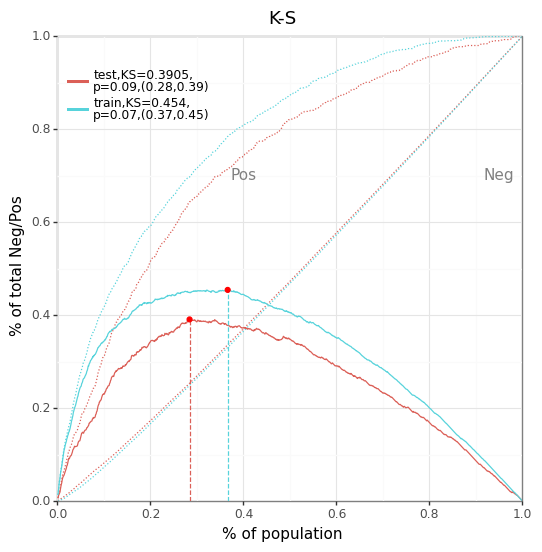

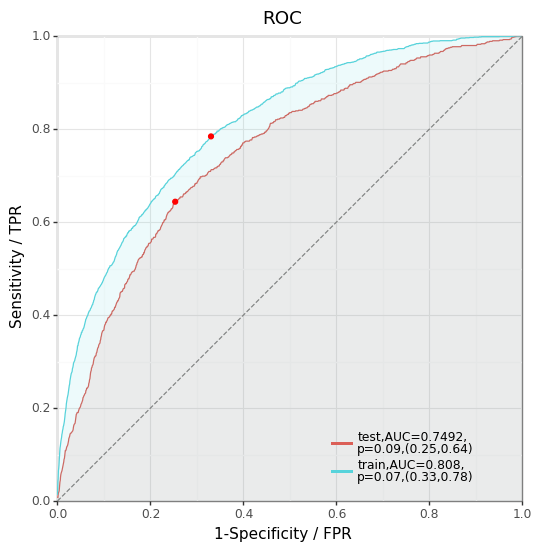

{'ks': <ggplot: (8779368422903)>, 'roc': <ggplot: (8779386171968)>}

In [19]:
y=pd.concat([
    y_train,
    y_test]
)

pred=pd.concat([
    pd.Series(p_model.predict_proba(X_train),index=X_train.index),
    pd.Series(p_model.predict_proba(X_test),index=X_test.index)]
)

group=pd.concat([
    pd.Series('train',index=X_train.index),
    pd.Series('test',index=X_test.index)]
)

bm.perfEval().plot(pred,y,group,figure_size=(6,6)) #可以看到test数据上ks与auc的情况,此结果可作为模型结果的参考值

## 4 特征筛选

### 4.1 预筛

预筛:当特征数量过多时，快速筛选掉无用特征

bm.preSelector提供了类似的功能,能够快速过滤掉那些**非常不重要的特征**

    Step 1.缺失值(所有):缺失率高于用户定义值的列将被筛除
    Step 2.唯一值(所有):唯一值占比高于用户定义值列将被筛除
    Step 3.方差(数值特征):方差低于用户定义值列的列将被筛除
    Step 4.卡方独立性检验p值(字符)/方差分析p值(数值):p值大于用户定义值的列将被剔除(不支持样本权重)
    Step 5.Lightgbm筛选(所有):split重要性低于用户定义值的列将被剔除
    Step 6.Iv值筛选(所有):等频30箱后iv值低于用户定义值的列将被剔除
    
详见帮助文档

In [20]:
pre=bm.preSelector(
    na_pct=0.95, #缺失率高于na_pct的列将被筛除
    unique_pct=0.95,#唯一值占比高于unique_pct的列将被筛除
    variance=0,#方差低于variance的列(连续)将被筛除
    chif_pvalue=0.05,#大于chif_pvalue的列将被剔除
    tree_imps=1,#split_gain小于等于tree_imps的列将被剔除
    tree_size=250,#LGBM树个数
    iv_limit=0.02 #iv小于等于iv_limit的特征将被踢出
).fit(X_train,y_train)

-----------------------------------------------Start------------------------------------------------
                       1.filterbyNA______________________________Done.
                       2.filterbyUniquepct_______________________Done.
                       3.filterbyVariance________________________Done.
                       4.filterbyChi2Oneway______________________Done.
                       5.filterbyTrees___________________________Done.
                       6.filterbyIV______________________________Done.
------------------------------------------------Done------------------------------------------------
Step:0.orgin,features remain:119
Step:1.filterbyNA,features remain:114
Step:2.filterbyUnique,features remain:114
Step:3.filterbyVariance,features remain:114
Step:4.filterbyChi2Oneway,features remain:108
Step:5.filterbyTrees,features remain:106
Step:6.filterbyIV,features remain:101


In [21]:
X_train_1=pre.transform(X_train) #数据经transform后过滤掉了无用特征
X_test_1=pre.transform(X_test)

案例数据中的特征的预测能力都比较强，预筛选过程中有少量特征被筛选掉

### 4.2 分箱

#### 4.2.1 最优分箱

bm.binSelector提供了分箱算法的集成与特征筛选，详情请见帮助文档

这里使用决策树最优分箱，设定至少5箱、强制单调、并剔除此分箱条件下iv_limit低于0.02的特征

In [22]:
bins=bm.binSelector(method='tree',
                    coerce_monotonic=True,
                    iv_limit=0.02,n_jobs=-1,
                    bin_num_limit=5).fit(X_train_1,y_train)

bins的属性bins为dict结构，存储了分箱结果

In [23]:
bins.bins['Bureau_Var1033']

,variable,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,ks,ks_max,breaks
bin,,,,,,,,,,,,
"[-inf, 0.5)",Bureau_Var1033,6294,0.313134,5977.0,317.0,0.050365,-0.481512,0.059415,0.14631,0.123393,0.170292,0.5
"[0.5, 0.8)",Bureau_Var1033,2535,0.126119,2384.0,151.0,0.059566,-0.303995,0.010263,0.14631,0.157153,0.170292,0.8
"[0.8, 0.9)",Bureau_Var1033,1875,0.093284,1746.0,129.0,0.068800,-0.150010,0.001971,0.14631,0.170292,0.170292,0.9
"[0.9, 1.0)",Bureau_Var1033,3952,0.196617,3554.0,398.0,0.100709,0.265883,0.015548,0.14631,0.111814,0.170292,1.0
"[1.0, inf)",Bureau_Var1033,2006,0.099801,1723.0,283.0,0.141077,0.648885,0.055168,0.14631,0.026794,0.170292,inf
special,Bureau_Var1033,0,0.000000,0.0,0.0,NaN,0.000000,0.000000,0.14631,0.026794,0.170292,special
missing,Bureau_Var1033,3438,0.171045,3127.0,311.0,0.090460,0.147224,0.003945,0.14631,0.000000,0.170292,missing


对分箱结果进行展示,bins.breaks_list作为bm.varReport的入参可以将分箱结果输出并绘制报告,方法woe_plot在于输出特征分析图

In [24]:
f_figs=bm.varReport(bins.breaks_list).fit(X_train_1,y_train).woe_plot()

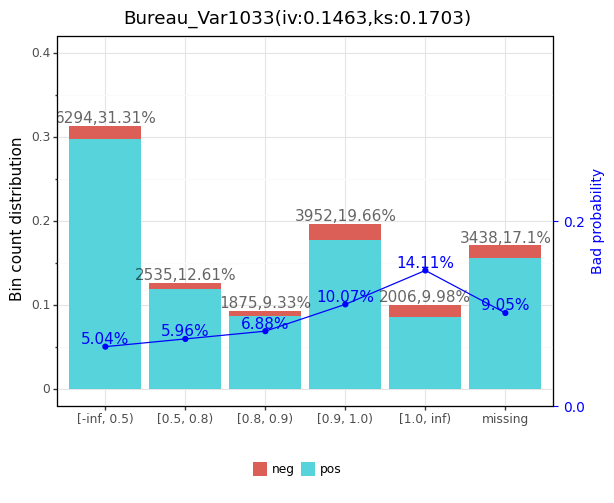

In [25]:
f_figs['Bureau_Var1033'] #以Bureau_Var1033为例，显示授信使用率越大客户违约风险越大

#### 4.2.2 交互分箱调整

分箱应尽可能保证稳定性、可解释性与足够的信息含量，而无论何种算法的分箱结果往往都只是参考，进行交互分箱可以以专家经验调整分箱结果至合理区间
bm.binAdjuster提供了交互分箱的功能

In [26]:
X=pd.concat(
    [
        X_train_1.assign(split='train'), #增加组特征train
        X_test_1.assign(split='test') #增加组特征test
    ],axis=0
)

y=pd.concat(
    [
        y_train,
        y_test
    ],axis=0
)

交互分箱中的5个选项:

```
1: next:当前特征分箱完毕,跳转到下个特征
2: yes:调整当前特征分箱:
    输入需调整的分箱:
        + 连续:输入[数值1,数值2,...]调整分段继续，
            - 分段中不用写最大/最小值
            - 若输入空白则会在全数据上进行最优分箱
        + 分类:输入[字符1,字符2,...]调整分段继续，
            - 其中若合并分类特征写成“字符3%,%字符4”
            - 其中字符必须涵盖该分类特征的所有水平,若有遗漏则将被转换为missing            
3: back :返回前一个特征并进行调整
4: remove :当前特征分箱无法调整至合理水平,在调整最终结果中剔除该特征信息
        + 只要某特征被选择为remove,那么该特征无论调整了多少次分箱都会被最终从结果中剔除
0: exit:终止分箱程序
    + 输入"y"终止,其他则继续
```

最终分箱结果将被保存在类属性breaks_list_adj中,使用bin_adj.breaks_list_adj进行调用

----Adjusting Age...----
Current breaks: [32.0, 37.0, 54.0, 58.0]...
[32.0, 37.0, 54.0, 58.0]
PSI at current breaks:[('train', 0.0), ('test', 0.0011)]


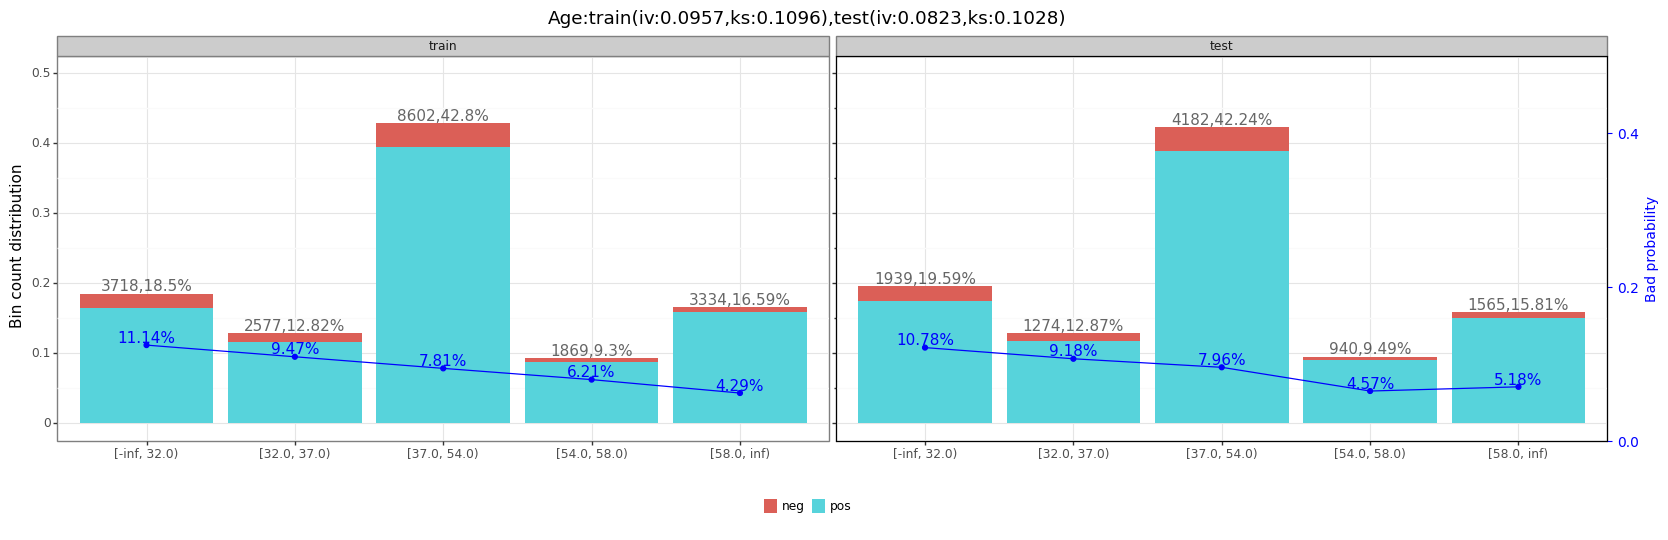

>>> Adjust breaks for (1/81) Age?
1: next 
2: yes 
3: back 
4: remove 
0: exit
Selection: 0
Adjustion has not been completed yet,are you sure?
Input 'y' to exit or other to continue :y
Stop adjusting...,result store in global variables "breaks_list_adj" and "vtabs_dict_adj"


In [27]:
bin_adj=bm.binAdjuster(bins.breaks_list,
                       column='split',
                       sort_column=['train','test'],
                       psi_base='split=="train"',figure_size=(20,5)).fit(X,y)

这里因篇幅所限不做过多展示，读者可自行研究

## 5 WOE编码

bm.woeTransformer提供了woe编码功能,其主要入参为bins.bins即特征分析报告字典结构

+ 参数woe_missing用于当比例低于distr_limit时missing的WOE编码结果,这是因为当missing箱样本量极少时，woe值可能不具备代表性，此时可调整varbin中的woe替换值至合理水平，例如设定为0,其被保存在woe.varbin中待用

+ 其他参数请见帮助文档

In [28]:
woe=bm.woeTransformer(bins.bins,woe_missing=0,distr_limit=0.05).fit(X_train,y_train)
X_train_woe=woe.transform(X_train)
X_test_woe=woe.transform(X_test)

## 6 特征聚类

经过编码后的数据会作为最终的模型输入,一般在经典评分卡中,需避免多重共线性,这里可使用变量聚类进行筛选

### 6.1 特征聚类

特征聚类可以提供相关性较强的特征组信息,进而能够让建模者对各个特征在各个组里的情况一目了然。

+ bm.faSelector提供了基于sklearn层次聚类的列聚类算法实现,并用于高相关特征组的变量筛选,
    + 此算法适合在在特征数量不多的情况下筛选高相关特征
        + 层次聚类算法详见sklearn.cluster.FeatureAgglomeration(自底向上逐步合并的层次聚类算法)
        + 对距离矩阵进行预计算再进行拟合(FeatureAgglomeration(affinity='precomputed').fit(distance_matrix))
            + 可选距离度量:
                + 1.Pearson相关性距离,即Pearson相关系数绝对值的相反数      
                + 2.Spearman相关性距离,即Spearman相关系数绝对值的相反数
                + 3.R2距离，即r2值的相反数

    + 此算法非SAS的变量聚类,但想达到的目的是一致的
    + 参数n_clusters用于指定聚类个数,为"auto"时结合参数corr_limit将自动确定聚类数量:
       + 使用相关性分析对原始数据中可能出现的特征类个数进行估计,corr_limit越高特征类个数越多,反之越少
       + 经验上corr_limit=0.7左右下的分群列特征值最大的前两个主成分累积解释占比在0.6-0.7以上,
           + corr_limit越大前两个主成分累积解释占比越大,同时聚类数量越多
    + 参数distance_metrics用于指定列距离度量方式,默认将使用pearson距离(pearson相关系数绝对值的相反数)
    + 参数by用于指定筛选方式,
       + 默认'r2-ratio',类似于SAS的变量聚类,将筛选每一类特征集中r2-ratio最小的特征输出
       + 可指定任意权重用于筛选变量,例如iv,ks等

In [29]:
fa=bm.faSelector(n_clusters='auto',corr_limit=0.8,by='r2-ratio').fit(X_train_woe,y_train)

n_clusters set to 51


属性components_infos记录了:

   + 每一个特征类的类信息(cluster)
   + 类变量个数(n_vars)
   + 前两大特征值(eigval1,eigval2)
   + 前两大特征值累积解释比例(explained_ratio)
   
一般认为explained_ratio最少需大于0.7的类的聚类效果较好

In [30]:
fa.components_infos.sort_values('explained_ratio').head()

,cluster,n_vars,eigval1,eigval2,explained_ratio
0,0,4,0.186517,0.013714,0.887123
2,2,2,0.143525,0.012148,0.921962
11,11,5,0.144155,0.005940,0.924568
4,4,5,0.122885,0.005290,0.926970
1,1,3,0.095474,0.005211,0.927506


属性rsquare_infos记录了:

   + 每一个特征类的类信息(Cluster)
   + 特征的类内R方(R2_Featrues),特征与其类最大主成分的R2指标
   + 特征的类间R方(R2_Neigbor),特征与最邻近类的主成分的R2指标
   + 1-R2Ratio:(1-R2_Featrues)/(1-R2_Neigbor) 
       + 分子指该特征在组内的异质度，值越小说明特征与该组的信息重叠较多
       + 分母指该特征在最临近组的异质度，值越小说明特征与最临近组的信息重叠较多
       + 1-R2Ratio值越小则说明变量越能够代表该类
       

In [31]:
fa.rsquare_infos

,Cluster,R2_Featrues,R2_Neigbor,1-R2Ratio
Age,27,1.0,0.271839,0.000000e+00
Bureau_Var102,41,1.0,0.556499,0.000000e+00
Bureau_Var1033,43,1.0,0.560379,5.050815e-16
Bureau_Var1036,36,1.0,0.560379,5.050815e-16
Bureau_Var1044,42,1.0,0.557009,0.000000e+00
...,...,...,...,...
Previous_Var49,19,1.0,0.122023,0.000000e+00
Previous_Var545,9,1.0,0.122023,0.000000e+00
Score1,10,1.0,0.038155,0.000000e+00
Score2,32,1.0,0.092383,0.000000e+00


在筛选上:
+ 1.根据统计指标筛选,请注意这种方式过于机械与粗暴且会损失一些重要特征
    + 例如选择每一组的1-R2Ratio越小的变量作为最终的筛选标准
    + 通过用户定义的权重(iv等)作为最终的筛选标准(by参数指定)

In [32]:
X_train_woe_fa=fa.transform(X_train_woe) #直接得到基于1-R2Ratio的筛选特征
X_test_woe_fa=fa.transform(X_test_woe)


+ 2.根据每一个组变量集中的特征的业务理解进行筛选

In [33]:
fa.rsquare_infos.query("Cluster==1") #某个特征组的情况

,Cluster,R2_Featrues,R2_Neigbor,1-R2Ratio
Bureau_Var701,1,0.960061,0.730560,0.148230
Bureau_Var709,1,0.852617,0.687212,0.471193
Bureau_Var765,1,0.935720,0.691376,0.208278


In [34]:
X_train_woe[fa.rsquare_infos.query("Cluster==1").index].corr() #某个特征组的内部相关性情况

,Bureau_Var701,Bureau_Var709,Bureau_Var765
Bureau_Var701,1.000000,0.900304,0.913138
Bureau_Var709,0.900304,1.000000,0.826206
Bureau_Var765,0.913138,0.826206,1.000000


## 7.Logistic建模

### 7.1 逐步回归

bm.stepLogit提供了基于经典统计回归的逐步回归实现

逐步回归过程:

    +首先尝试加入:
        + 从潜在特征集合remaining中尝试所有特征并选择出使指标(aic,bic)优化的特征逐次加入selected集合中
        + 将remaining的相应特征剔除

    + 再进行剔除:
        + 在selected集合模型中的若p值过高(大于p_value_enter),那么新加入selected集合的特征将被剔除

    循环上述过程直到:
    + remaining不存在任何特征
    + remaining不存在任何特征可使指标(aic,bic)优化
    + 达到最大迭代次数

参数criterion可为aic或bic,实际效果上bic会比aic筛选掉更多的特征

参数custom_columns用于指定需进行逐步回归的列

In [35]:
custom_columns=X_train_woe_fa.columns.tolist()
custom_columns.remove('Bureau_Var116') #该变量的回归系数符号有问题,这里先剔除掉

In [36]:
model=bm.stepLogit(custom_columns,show_step=False,criterion='aic',p_value_enter=0.01).fit(X_train_woe_fa,y_train)

In [37]:
model.model_info #打印回归信息

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 TARGET   No. Observations:                20100
Model:                            GLM   Df Residuals:                    20083
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4843.7
Date:                Fri, 22 Jul 2022   Deviance:                       9687.4
Time:                        16:15:21   Pearson chi2:                 1.96e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.06849
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.4584      0.029    -83.635      0.000      -2.516      -2.401
Score2              0.7702      0.048     16.031      0.000       0.676       0.864
Score3              0.5871      0.054     10.936      0.000       0.482       0.692
Score1              0.5416      0.071      7.607      0.000       0.402       0.681
IP_Var24            0.6689      0.096      6.940      0.000       0.480       0.858
Bureau_Var1048      0.6495      0.087      7.476      0.000       0.479       0.820
DAYS_EMPLOYED       0.5304      0.093      5.724      0.000       0.349       0.712
Bureau_Var24        0.6641      0.133      4.978      0.000       0.403       0.926
EDULEVEL            0.6079      0.135      4.511      0.000       0.344       0.872
Bureau_Var1153      1.0356      0.170      6.075      0.000       0.701       1.370
Previous_Var545     0.7687      0.148      5.187      0.000       0.478       1.059
GENDER              0.7350      0.135      5.429      0.000       0.470       1.000
OWN_CAR_AGE         0.6412      0.178      3.608      0.000       0.293       0.990
Bureau_Var5         0.3569      0.104      3.439      0.001       0.154       0.560
Previous_Var22      0.4337      0.154      2.819      0.005       0.132       0.735
CITY_RATING         0.3543      0.119      2.969      0.003       0.120       0.588
IP_Var31            0.3885      0.139      2.800      0.005       0.117       0.661
===================================================================================
"""

### 7.2 vif信息

In [38]:
model.vif_info

,VIF Factor,features
0,1.202961,Score2
1,1.363204,Score3
2,1.128896,Score1
3,1.186918,IP_Var24
4,1.086920,Bureau_Var1048
5,1.093175,DAYS_EMPLOYED
6,1.321132,Bureau_Var24
7,1.059976,EDULEVEL
8,1.243047,Bureau_Var1153
9,1.051188,Previous_Var545


### 7.3 模型评估

+ bm.perfEval可用于模型评估

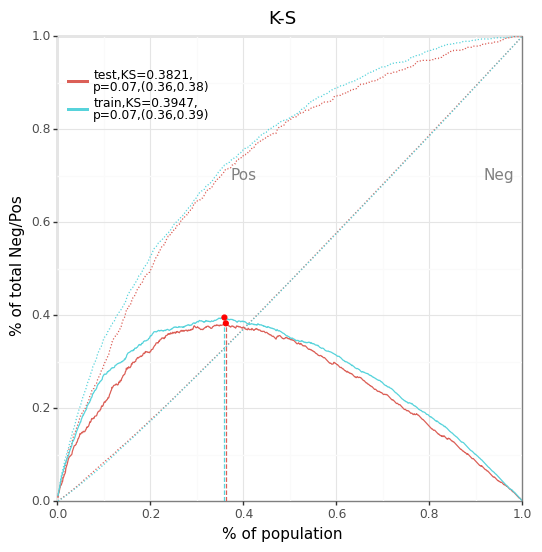

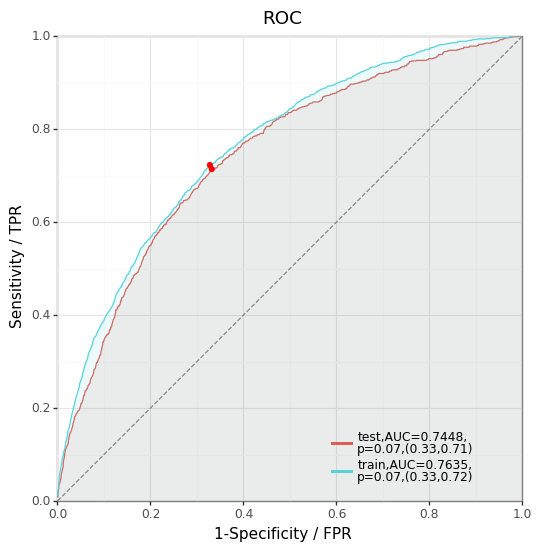

{'ks': <ggplot: (8779351633640)>, 'roc': <ggplot: (8779379939892)>}

In [39]:
y=pd.concat([
    y_train,
    y_test]
)

pred=pd.concat([
    pd.Series(model.predict_proba(X_train_woe_fa),index=X_train.index),
    pd.Series(model.predict_proba(X_test_woe_fa),index=X_test.index)]
)

group=pd.concat([
    pd.Series('train',index=X_train.index),
    pd.Series('test',index=X_test.index)]
)

bm.perfEval().plot(pred,y,group,figure_size=(6,6)) 

## 8.制作评分卡

### 8.1 产生评分卡

bm.cardScorer提供了制作评分卡功能

+ 注意演示中头两个参数
    + model.logit_model回归模型对象,可支持statsmodel与sklearn的回归模型
    + woe.varbin,进行woe编码时产生的特征分析报告字典
+ odds,pdo,points0分别代表了制作评分卡刻度的三个参数,即发生比、评分翻倍的分数间隔、基础分
+ 其他参数请见帮助文档

In [40]:
card=bm.cardScorer(model.logit_model,woe.varbin,odds0=0.08,pdo=60,points0=600,digit=0).fit(X_train_woe_fa)

经过fit后,产生属性scorecard即评分卡

In [41]:
pd.concat(card.scorecard)

variable  points       woe   breaks
intercept intercept     intercept   594.0       NaN      NaN
Score2    [-inf, 0.18)     Score2   -73.0  1.087775     0.18
          [0.18, 0.46)     Score2   -27.0  0.406076     0.46
          [0.46, 0.64)     Score2    15.0 -0.220465     0.64
          [0.64, 0.7)      Score2    43.0 -0.638849      0.7
...                           ...     ...       ...      ...
IP_Var31  [0.78, 0.86)   IP_Var31    -1.0  0.028078     0.86
          [0.86, 0.92)   IP_Var31     4.0 -0.110939     0.92
          [0.92, inf)    IP_Var31     7.0 -0.217372      inf
          special        IP_Var31    -0.0  0.000000  special
          missing        IP_Var31     5.0 -0.162782  missing

[97 rows x 4 columns]

### 8.2 产生评分

方法transform可以用于产生评分,注意transform后接原始数据

In [42]:
X_train_score=card.transform(X_train)
X_test_score=card.transform(X_test)

In [43]:
X_train_score.head()

,Score2,Score3,Score1,IP_Var24,Bureau_Var1048,DAYS_EMPLOYED,Bureau_Var24,EDULEVEL,Bureau_Var1153,Previous_Var545,GENDER,OWN_CAR_AGE,Bureau_Var5,Previous_Var22,CITY_RATING,IP_Var31,score
ID,,,,,,,,,,,,,,,,,
454807,15.0,-3.0,-3.0,12.0,10.0,19.0,1.0,-6.0,-22.0,-10.0,10.0,-2.0,5.0,5.0,1.0,7.0,633.0
267170,-27.0,47.0,34.0,-35.0,-31.0,19.0,12.0,-6.0,10.0,21.0,10.0,-2.0,3.0,-4.0,1.0,-1.0,645.0
405274,-27.0,47.0,-3.0,3.0,10.0,-10.0,12.0,-6.0,13.0,7.0,10.0,-2.0,5.0,3.0,1.0,7.0,664.0
210570,-27.0,-3.0,11.0,12.0,10.0,-10.0,1.0,-6.0,-22.0,-21.0,10.0,-2.0,5.0,-4.0,1.0,-1.0,548.0
397070,65.0,29.0,-3.0,-7.0,10.0,11.0,-10.0,-6.0,13.0,21.0,-17.0,-2.0,5.0,1.0,18.0,-9.0,713.0


### 8.3 评分表现

bm.varGroupsReport可用于产生评分表现,其具体用法请参考帮助文档

In [44]:
X_score=pd.concat(
    [
        X_train_score.join(y_train).assign(split='train'),
        X_test_score.join(y_test).assign(split='test')
    ]
)

In [45]:
bm.binFreq(X_train_score[['score']],y_train,bin_num_limit=10)[0] #等频分箱结果

{'score': [510.0, 553.0, 583.0, 609.0, 632.0, 655.0, 679.0, 706.0, 742.0]}

In [46]:
scoreperf=bm.varGroupsReport(
                   breaks_list_dict=bm.binFreq(X_train_score[['score']],y_train,bin_num_limit=10)[0],
                   columns=['split'],
                   sort_columns={'split':['train','test']},
                   output_psi=True,
                   psi_base='split=="train"',
                   target='TARGET',n_jobs=1
                  ).fit(X_score)

+ 评分表现(简版)

In [47]:
scoreperf.report_dict['report_brief']

variable             bin train                                         \
                            count   badprob       woe total_iv    ks_max   
0     score   [-inf, 510.0)  1985  0.278589  1.503791  1.00633  0.385701   
1     score  [510.0, 553.0)  1992  0.139558  0.636296  1.00633  0.385701   
2     score  [553.0, 583.0)  1998  0.101101  0.270211  1.00633  0.385701   
3     score  [583.0, 609.0)  2052  0.080897  0.025035  1.00633  0.385701   
4     score  [609.0, 632.0)  1966  0.054425 -0.399705  1.00633  0.385701   
5     score  [632.0, 655.0)  2040  0.050980 -0.468728  1.00633  0.385701   
6     score  [655.0, 679.0)  2011  0.036300 -0.823692  1.00633  0.385701   
7     score  [679.0, 706.0)  2016  0.027282 -1.118616  1.00633  0.385701   
8     score  [706.0, 742.0)  2001  0.018491 -1.516560  1.00633  0.385701   
9     score    [742.0, inf)  2039  0.006866 -2.519007  1.00633  0.385701   
10    score         special     0       NaN  0.000000  1.00633  0.385701   
11    score         missing     0       NaN  0.000000  1.00633  0.385701   

    test                                          
   count   badprob       woe  total_iv    ks_max  
0    931  0.235231  1.275757  0.789067  0.372904  
1   1043  0.162991  0.818626  0.789067  0.372904  
2    986  0.115619  0.420172  0.789067  0.372904  
3   1017  0.078663 -0.005893  0.789067  0.372904  
4    970  0.060825 -0.282242  0.789067  0.372904  
5    970  0.041237 -0.691542  0.789067  0.372904  
6   1056  0.032197 -0.948393  0.789067  0.372904  
7   1001  0.025974 -1.169578  0.789067  0.372904  
8    926  0.025918 -1.171797  0.789067  0.372904  
9   1000  0.017000 -1.602632  0.789067  0.372904  
10     0       NaN  0.000000  0.789067  0.372904  
11     0       NaN  0.000000  0.789067  0.372904

+ 评分表现(PSI)

In [48]:
scoreperf.report_dict['report_psi']

,variable,bin,train,test
,,,count_distr,count_distr
0,score,"[-inf, 510.0)",0.098756,0.094040
1,score,"[510.0, 553.0)",0.099104,0.105354
2,score,"[553.0, 583.0)",0.099403,0.099596
3,score,"[583.0, 609.0)",0.102090,0.102727
4,score,"[609.0, 632.0)",0.097811,0.097980
5,score,"[632.0, 655.0)",0.101493,0.097980
6,score,"[655.0, 679.0)",0.100050,0.106667
7,score,"[679.0, 706.0)",0.100299,0.101111
8,score,"[706.0, 742.0)",0.099552,0.093535


+ 评分表现(绘图)

bm.varGroupsPlot提供了组特征分析报告的绘图，在此可以绘制评分表现的图

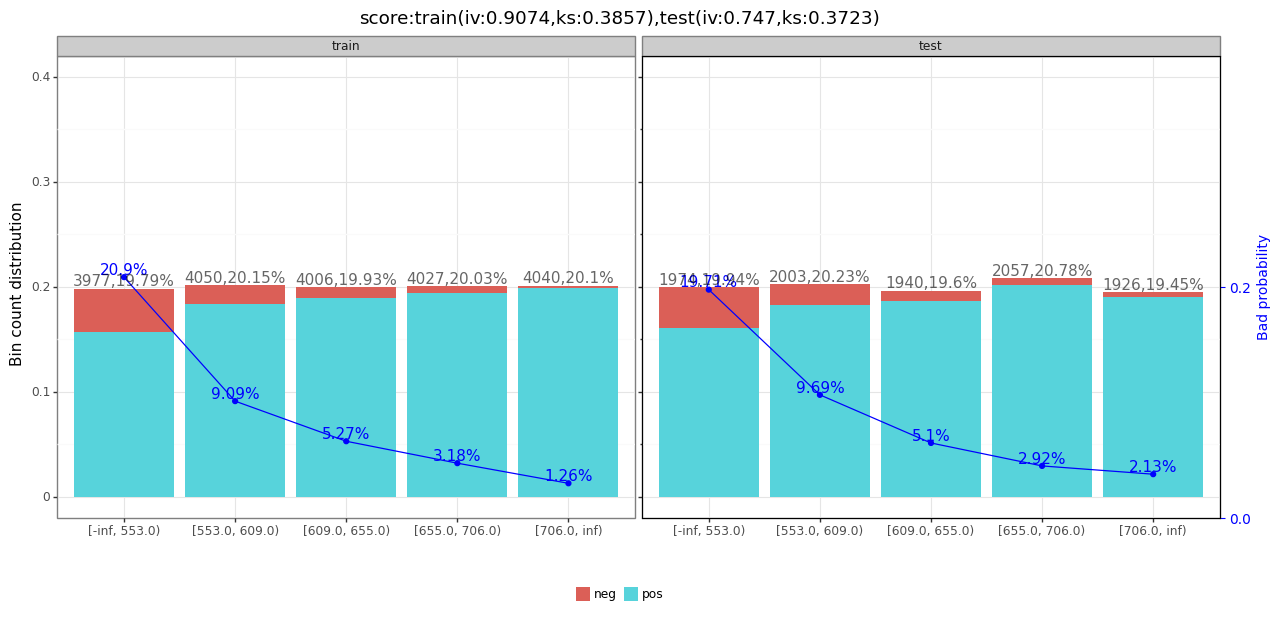

In [49]:
figs=bm.varGroupsPlot(breaks_list=bm.binFreq(X_train_score[['score']],y_train,bin_num_limit=5)[0],#10箱字太小,设定为5箱
                  column='split',
                  target='TARGET',
                  sort_column=['train','test'],
                  n_jobs=1
                 ).plot(X_score,figure_size=(15,6))
figs['score']